In [48]:
import scipy.sparse as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve  # ← IMPORTANTE

In [33]:
ADense= np.array([[0,1,0,0],[0,0,0,2],[0,0,3,0],[4,0,0,0]])
#ADense= np.array([[0,3,1,0,0],[0,0,5,2,0],[0,0,0,0,6]])
print("A = \n", ADense)
values = [1,2,3,4]
rows = [0,1,2,3]
cols = [1,3,2,0]
ASparse = sp.coo_matrix((values,(rows,cols)),shape=[4,4])
print("ADense = \n", ASparse)

A_csr = ASparse.tocsr()
print("A_csr= \n", A_csr)
print(A_csr.data)
print(A_csr.indices)
print(A_csr.indptr)

A = 
 [[0 1 0 0]
 [0 0 0 2]
 [0 0 3 0]
 [4 0 0 0]]
ADense = 
 <COOrdinate sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4
A_csr= 
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 1)	1
  (1, 3)	2
  (2, 2)	3
  (3, 0)	4
[1 2 3 4]
[1 3 2 0]
[0 1 2 3 4]


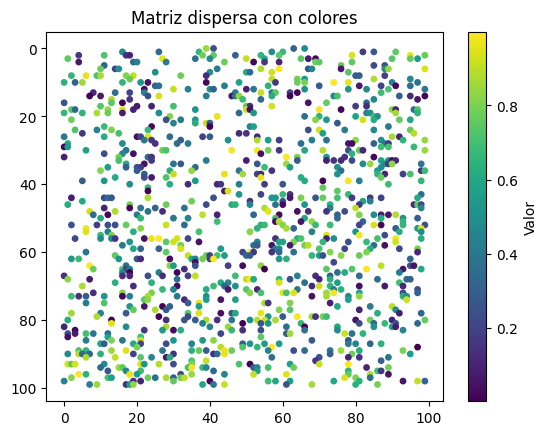

In [35]:
A = sp.random(100, 100, density=0.1, format='csr')
#print(A)
#plt.spy(A, markersize=0.8)
#plt.title("Matriz dispersa (COO)")
#plt.show()


# Convertir a COO para acceder a .row y .col
A_coo = A.tocoo()

# Graficar los puntos no nulos con colores
plt.scatter(A_coo.col, A_coo.row, c=A_coo.data, cmap='viridis', s=15)
plt.gca().invert_yaxis()  # que el origen quede arriba

# Agregar colorbar como leyenda
plt.colorbar(label="Valor")
plt.title("Matriz dispersa con colores")
plt.show()

In [53]:
n = 100  # 10,000 ecuaciones

# --- Crear matriz dispersa CSR ---
A = sp.random(n, n, density=0.001, format='csr')
A.setdiag(np.random.rand(n) + 1.0)  # asegurar que la diagonal no sea cero

# --- Vector de términos independientes ---
b = np.random.rand(n)

# --- Resolver el sistema lineal disperso usando método iterativo ---
x = spsolve(A, b)

# --- Comprobaciones ---
print("Sistema resuelto correctamente.")
print("Tamaño de la solución:", x)



Sistema resuelto correctamente.
Tamaño de la solución: [ 0.23067207  0.09603651  0.36877581  0.05048754  0.70894013  0.45822717
  0.6089107   0.15345856  0.82864728  0.45675029  0.1281842   0.08621741
  0.51804169  0.22608193  0.57017958  0.19723862  0.55068686  0.65829955
  0.33821211  0.25478803  0.35350814  0.08497249  0.29131201  0.17576776
  0.25102355  0.38276812  0.91465189  0.63774491  0.80455682  0.58337768
  0.01590606  0.39071148  0.36922383  0.09013856  0.1038279  -0.13009843
  0.66959889  0.14093098  0.03453075  0.48433882 -0.15866442  0.42289789
  0.0514461   0.01306401  0.5622898   0.13436681  0.50484047  0.00633281
  0.10898131  0.09688618  0.18280573  0.40967922  0.053464    0.27319171
  0.2209781   0.31970058  0.41820276  0.48960892  0.63632117  0.14620164
  0.39651882  0.79986076  0.40460351  0.03784022  0.1836382   0.00807604
  0.66929768  0.13895166  0.48658492  0.29063145  0.14049184  0.31445744
  0.14108958  0.06987987  0.09061782  0.32639998  0.00881779  0.42054